# <font color='grey'>Estatística Descritiva Univariada categórica</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show Pandas
matplotlibVersion = !pip show matplotlib
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1


In [ ]:
# Instalar versão específica de uma biblioteca
#!pip install matplotlib==3.7.1

In [3]:
!pip install pandas==2.0.2 --user

In [4]:
!pip install matplotlib==3.7.1 --user

  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0


## Estatística Descritiva
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
    
**Estatística Descritiva** descreve e sintetiza as características principais observadas em um conjunto de dados por meio de tabelas, gráficos e medidas de resumo, permitindo uma melhor compreensão do comportamento dos dados. <br>
A Estatística Descritiva pode ser: <br>
- **Univariada**: estuda uma única variável; <br>
- **Bivariada**: estuda duas variáveis; <br>
- **Multivariada**: estuda mais de duas variáveis. <br>

A estatística descritiva univariada contempla as seguintes técnicas: <br>
- Tabela de distribuição de frequências; <br>
- Representação da distribuição de uma variável por meio de gráficos; <br>
- Medidas de posição ou localização; <br>
- Medidas de dispersão ou variabilidade; <br>
- Medidas de forma que são a assimetria e a curtose. <br>

Estatísticas descritivas utilizadas com variáveis **qualitativas** ou **categóricas**: <br>
- Tabelas de distribuição de frequências; <br>
- Gráficos de barra, de pizza e o diagrama de Pareto. <br>

Estatísticas descritivas utilizadas com variáveis **quantitativas**: <br>
- Gráficos de linhas, de dispersão, histograma e boxplot; <br>
- Medidas de posição ou localização; <br>
- Medidas de dispersão ou variabilidade; <br>
- Medidas de forma que são a assimetria e a curtose; <br>
- Tabela de distribuição de frequências. <br>
    
</details>


In [2]:
# Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Coletando os dados
df = pd.read_csv('Dados/Tips/tips.csv')
# Renomenando as colunas
df.columns = ["Total da Conta", "Valor da Gorjeta", "Sexo", "Fumante", "Dia", "Horário", "Quantidade de Pessoas"]
df


# linhas = observações
# colunas = variáveis

,Total da Conta,Valor da Gorjeta,Sexo,Fumante,Dia,Horário,Quantidade de Pessoas
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
# Verificando informações sobre cada coluna do DataFrame.
df.info()


# uma coisa importante:

# normalmente as colunas do tipo float e do tipo inteiro são variáveis quantitativas
# (mas lembre-se que números podem ser usados para identificação de categorias, como por exemplo):
# - 0 para masculino
# - 1 para feminino
# ...se esse fosse o caso, seriam dados qualitativos, por estar usando os números para representar categorias

# é possível identificiar esse padrão quando se em uma coluna há repetição de valores.

# -------------------------------------------------------------------------------------------------------------

# dados do tipo object significam que são do tipo string

# - uma coluna do tipo string é uma forte candidata a ser qualitativa
# ou tbm chamada de categórica.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total da Conta         244 non-null    float64
 1   Valor da Gorjeta       244 non-null    float64
 2   Sexo                   244 non-null    object 
 3   Fumante                244 non-null    object 
 4   Dia                    244 non-null    object 
 5   Horário                244 non-null    object 
 6   Quantidade de Pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Tabela de Distribuição de Frequências
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
    
No caso de variáveis categóricas, a tabela representa a frequência de ocorrências de cada categoria da variável.<br>
Uma tabela de distribuição de frequências compõe os seguintes cálculos: <br>
- **Frequência absoluta ( <em>Fi</em> )**: número de ocorrências de cada elemento <em>i</em> na amostra; <br>
- **Frequência relativa ( <em>Fri</em> )**: porcentagem relativa à frequência absoluta; <br>
- **Frequência acumulada ( <em>Fac</em> )**: soma de todas as ocorrências até o elemento analisado; <br>
- **Frequência relativa acumulada ( <em>Frac</em> )**: porcentagem relativa à frequência acumulada. 

</details>


### Frequência absoluta ( <em>Fi</em> )

In [7]:
# Frequência absoluta da variável Dia 
fiDia = df.Dia.value_counts()
fiDia

Dia
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

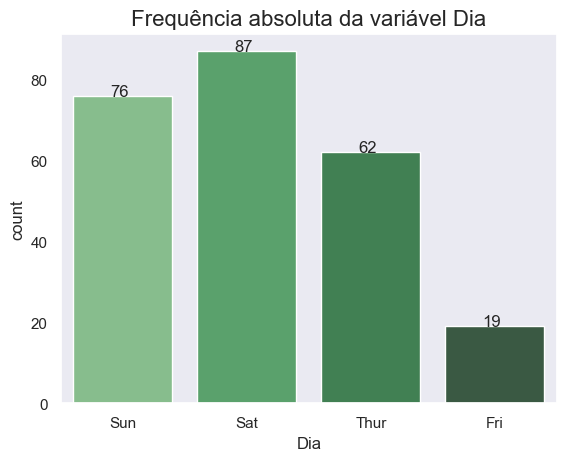

In [8]:
# Visualização gráfica da frequência absoluta da vSexoiável Dia

sns.set_theme(style="dark") # Define o tema utilizado

# Desenha um Countplot
ax = sns.countplot(x=df["Dia"], palette = "Greens_d");
ax.set_title("Frequência absoluta da variável Dia", fontsize = 16)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.5
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")

In [9]:
# Verificando o tipo de dados 
type(fiDia)

pandas.core.series.Series

In [12]:
# Construindo a Tabela de Distribuição de Frequências

# converte a série para um DataFrame
df2 = fiDia.to_frame()

# renomeia a coluna
df2.columns = ["Fi"]
df2

,Fi
Dia,
Sat,87
Sun,76
Thur,62
Fri,19


### Frequência relativa ( <em>Fri</em> )

In [19]:
# Frequência relativa da variável Dia
friDia = (fiDia / df.Dia.count())*100
friDia


# a frequência relativa é a porcentagem relativa a frequência absoluta

# ou seja, precisamos saber antes a frequência absoluta para calcular a frequência relativa

# esse é o cálculo:
# (frequência absoluta / quant. de elementos da variável) * 100

Dia
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: count, dtype: float64

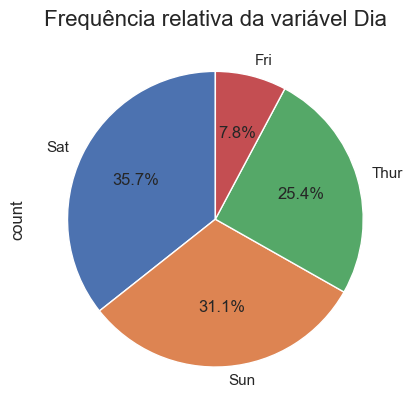

In [20]:
# Visualização gráfica da frequência relativa da variável Dia

# Desenhando um gráfico de pizza
ax = friDia.plot.pie(autopct='%1.1f%%', startangle=90)
ax.set_title("Frequência relativa da variável Dia", fontsize = 16)
plt.show()

In [21]:
# Construindo a Tabela de Distribuição de Frequências

# Criando uma nova coluna
df2["Fri %"] = round(friDia,2)    # round() arredonda os valores para 2 casas decimais
df2

,Fi,Fri %
Dia,,
Sat,87,35.66
Sun,76,31.15
Thur,62,25.41
Fri,19,7.79


### Frequência acumulada ( <em>Fac</em> )

In [23]:
# Frequência acumulada da variável Dia
facDia = fiDia.cumsum()
facDia

# é a soma de todas as ocorrências até o elemento analisado
# é calculada sobre a frequência absoluta

Dia
Sat      87
Sun     163
Thur    225
Fri     244
Name: count, dtype: int64

In [24]:
# Visualizando a frequência absoluta da variável Dia
fiDia

Dia
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [26]:
# Construindo a Tabela de Distribuição de Frequências

# Criando uma nova coluna
df2["Fac"] = round(facDia,2)
df2

,Fi,Fri %,Fac
Dia,,,
Sat,87,35.66,87
Sun,76,31.15,163
Thur,62,25.41,225
Fri,19,7.79,244


### Frequência relativa acumulada ( <em>Frac</em> )

In [27]:
# Frequência relativa acumulada da variável Dia
fracDia = (facDia / df.Dia.count())*100
fracDia

# é a porcentagem relativa (percentuais relativos) à frequência acumulada

Dia
Sat      35.655738
Sun      66.803279
Thur     92.213115
Fri     100.000000
Name: count, dtype: float64

In [28]:
# Visualizando a frequência acumulada da variável Dia
facDia

Dia
Sat      87
Sun     163
Thur    225
Fri     244
Name: count, dtype: int64

In [34]:
# Criando uma nova coluna
df2["Frac %"] = round(fracDia,2)
df2

,Fi,Fri %,Fac,Frac %
Dia,,,,
Sat,87,35.66,87,35.66
Sun,76,31.15,163,66.80
Thur,62,25.41,225,92.21
Fri,19,7.79,244,100.00


### Tabela de Distribuição de Frequências

In [36]:
# Reiniciando o índice da DataFrame
df3 = df2.reset_index()
df3.columns = ["Dia", "Fi", "Fri %", "Fac", "Frac %"]    # não é necessário reiniciar os nomes das colunas
df3

,Dia,Fi,Fri %,Fac,Frac %
0,Sat,87,35.66,87,35.66
1,Sun,76,31.15,163,66.80
2,Thur,62,25.41,225,92.21
3,Fri,19,7.79,244,100.00


### Diagrama de Pareto
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
    
O diagrama de Pareto é um gráfico de barras em que as barras exibem as frequências absolutas em ordem decrescente e também a frequência relativa acumulada em um gráfico de linhas. <br>
É muito utilizado quando se deseja fazer um controle de qualidade sobre os produtos e serviços. <br>
Normalmente, utiliza-se o diagrama de Pareto para fazer o controle de defeitos e problemas. <br> Contudo, pode ser utilizado em diversas áreas, com o objetivo de obter insights e, consequentemente, melhorar a tomada de decisões. 

</details>


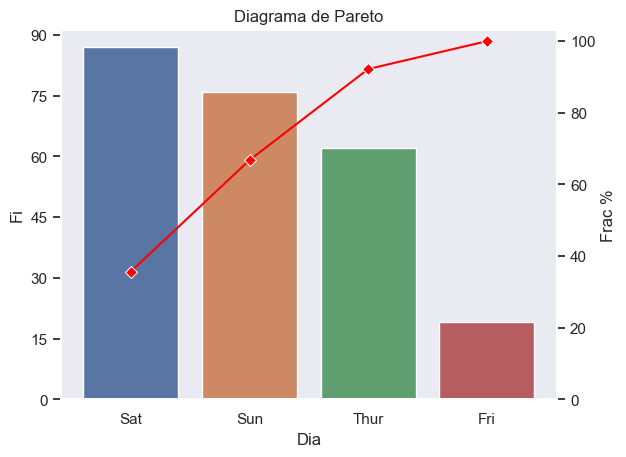

In [50]:
# Cria um gráfico de barras
ax = sns.barplot(x=df3.Dia, y=df3.Fi)
ax.set_title("Diagrama de Pareto")
# Define os valores do eixo y da esquerda
ax.set_yticks(np.arange(0, 100, 15))

# Cria un eixo secundário, é criado um segundo gráfico
ax2 = ax.twinx()

# Cria um gráfico de linhas
ax2 = sns.lineplot(x=df3.Dia, y=df3["Frac %"], marker="D", color="red" )
# Define os valores do eixo y da direita
ax2.set_yticks(np.arange(0, 120, 20))
plt.show()

## Exercício
1 - Construa a Tabela de Distribuição de Frequências da variável Survived do dataset Titanic.

In [1]:
# Importando os pacotes
import pandas as pd

In [2]:
# Coletando os dados
df = pd.read_csv('Dados/Titanic/train.csv')

# Renomeando a coluna Survived 
df.rename(columns = {"Survived":"Sobrevivente"}, inplace = True) 
df.head()

,PassengerId,Sobrevivente,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Frequência absoluta da variável Sobrevivente 
fiSobrevivente = df.Sobrevivente.value_counts()
fiSobrevivente

Sobrevivente
0    549
1    342
Name: count, dtype: int64

In [4]:
# Construindo a Tabela de Distribuição de Frequências

# converte a série para um DataFrame
df2 = fiSobrevivente.to_frame()

# renomeia a coluna
df2.columns = ["Fi"]
df2

,Fi
Sobrevivente,
0,549
1,342


In [5]:
# Frequência relativa da variável Sobrevivente
friSobrevivente = (fiSobrevivente / df.Sobrevivente.count())*100
friSobrevivente

Sobrevivente
0    61.616162
1    38.383838
Name: count, dtype: float64

In [6]:
# Construindo a Tabela de Distribuição de Frequências

# Criando uma nova coluna
df2["Fri %"] = round(friSobrevivente,2)
df2

,Fi,Fri %
Sobrevivente,,
0,549,61.62
1,342,38.38


In [7]:
# Frequência acumulada da variável Sobrevivente
facSobrevivente = fiSobrevivente.cumsum()
facSobrevivente

Sobrevivente
0    549
1    891
Name: count, dtype: int64

In [8]:
# Construindo a Tabela de Distribuição de Frequências

# Criando uma nova coluna
df2["Fac"] = round(facSobrevivente,2)
df2

,Fi,Fri %,Fac
Sobrevivente,,,
0,549,61.62,549
1,342,38.38,891


In [9]:
# Frequência relativa acumulada da variável Sobrevivente
fracSobrevivente = (facSobrevivente / df.Sobrevivente.count())*100
fracSobrevivente

Sobrevivente
0     61.616162
1    100.000000
Name: count, dtype: float64

In [10]:
# Criando uma nova coluna
df2["Frac %"] = round(fracSobrevivente,2)
df2

,Fi,Fri %,Fac,Frac %
Sobrevivente,,,,
0,549,61.62,549,61.62
1,342,38.38,891,100.00


### Tabela de Distribuição de Frequências

In [11]:
# Reiniciando o índice da DataFrame
df3 = df2.reset_index()
df3.columns = ["Sobrevivente", "Fi", "Fri %", "Fac", "Frac %"]
df3

,Sobrevivente,Fi,Fri %,Fac,Frac %
0,0,549,61.62,549,61.62
1,1,342,38.38,891,100.00
